In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [0]:
width = 512#1060#530#265
height = 512#596#298#149

In [0]:
from PIL import Image

import glob
image_list = []
counter = 0
for filename in glob.glob('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/*JPG'): #assuming gif
    im=Image.open(filename)
    im = im.resize((width, height), Image.ANTIALIAS)#.convert('L') #265:149
    image_list.append(im)
    counter += 1
label = np.empty(counter)
label.fill(1)

In [0]:

counter = 0
for filename in glob.glob('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_2/*JPG'): #assuming gif
    im=Image.open(filename)
    im = im.resize((width, height), Image.ANTIALIAS)#.convert('L') #265:149
    image_list.append(im)
    counter += 1
a = np.empty(counter)
a.fill(2)



In [0]:
label = np.concatenate((label, a), axis=0)

In [0]:
label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2.])

In [0]:
Y = label

In [0]:
len(label)

120

In [0]:
len(image_list)

120

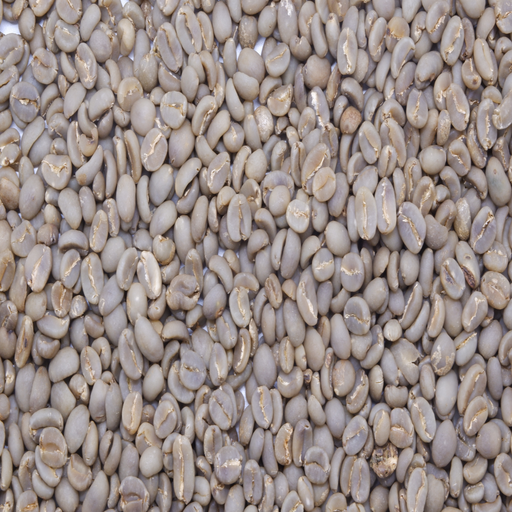

In [0]:
from IPython.display import Image as Img

display(image_list[8])

In [0]:
image_list

[<PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B4F30B8>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B4F35F8>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B4F32B0>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B4F6F60>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B4F9BE0>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B4F9E10>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B4FE908>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B4FA550>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B4FD320>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B500278>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B502400>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B5078D0>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B504400>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B5057B8>,
 <PIL.Image.Image image mode=RGB size=512x512 at 0x7FE89B508358>,
 <PIL.Imag

In [0]:
from matplotlib import image
from matplotlib import pyplot

from numpy import asarray

X = []

for iimage in image_list:
    data = np.asarray(iimage)
    # summarize shape
    # print(data.shape)
    # create Pillow image
    # image2 = Image.fromarray(data)
    X.append(data)

In [0]:
X[0].shape

(512, 512, 3)

In [0]:
# X = np.array(X)

In [0]:
# X.shape

In [0]:
X = [x.flatten() for x in X]

In [0]:
X = np.array(X)

In [0]:
X[0]

array([179, 169, 170, ..., 131, 122, 129], dtype=uint8)

In [0]:
len(X)

120

In [0]:
X.shape

(120, 786432)

In [0]:
# X = X.reshape(120, 1)

In [0]:
# X.shape

In [0]:
# X[1]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=33)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
neigh.score(X_test,y_test)

0.5555555555555556

In [0]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

clf.score(X_test,y_test)

0.3611111111111111

In [0]:
# Import the model we are using
# from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
# rf.fit(X_train, y_train)
# clf.score(X_test,y_test)